# Example of a GenerativeModel instance usage

Input data for GenerativeModel includes small training sample. It should have an array-like table format with the (n_samples, n_features) dimensionality. The sample should contain only continious data with the number of features less than 50. The number of samples should be less than 30 and should not exceed 1000 samples. 

Downloading Iris Dataset as an example.

In [11]:
from sklearn.datasets import load_iris

X = load_iris().data

Fitting the optimal generative model in terms of overfitting with 'optimize' option and 10 sec. of Hyperopt optimization.

In [12]:
from asid.automl_small.gm import GenerativeModel

clf = GenerativeModel(gen_model_type="optimize", num_syn_samples=10, hyperopt_time=10)
clf.fit(X)

  0%|                | 76/9223372036854775807 [00:10<337339916726271:04:32,  7.59trial/s, best loss: 3.169252238241343]
The best generative model is stats_kde_cv_ml
zu metric: 1.0564455099654322
Training time:  0:04:15.294069


As a result a stats_kde_cv_ml was chosen and fitted. The optimal model label is stored in clf.gen_model_label_, the score value is stored in clf.score_. The information about the models fitted during the GenerativeModel's run is stored in clf.info_.

Let's visualize the GenerativeModel's search based on clf.info_ and compare the alternatives.

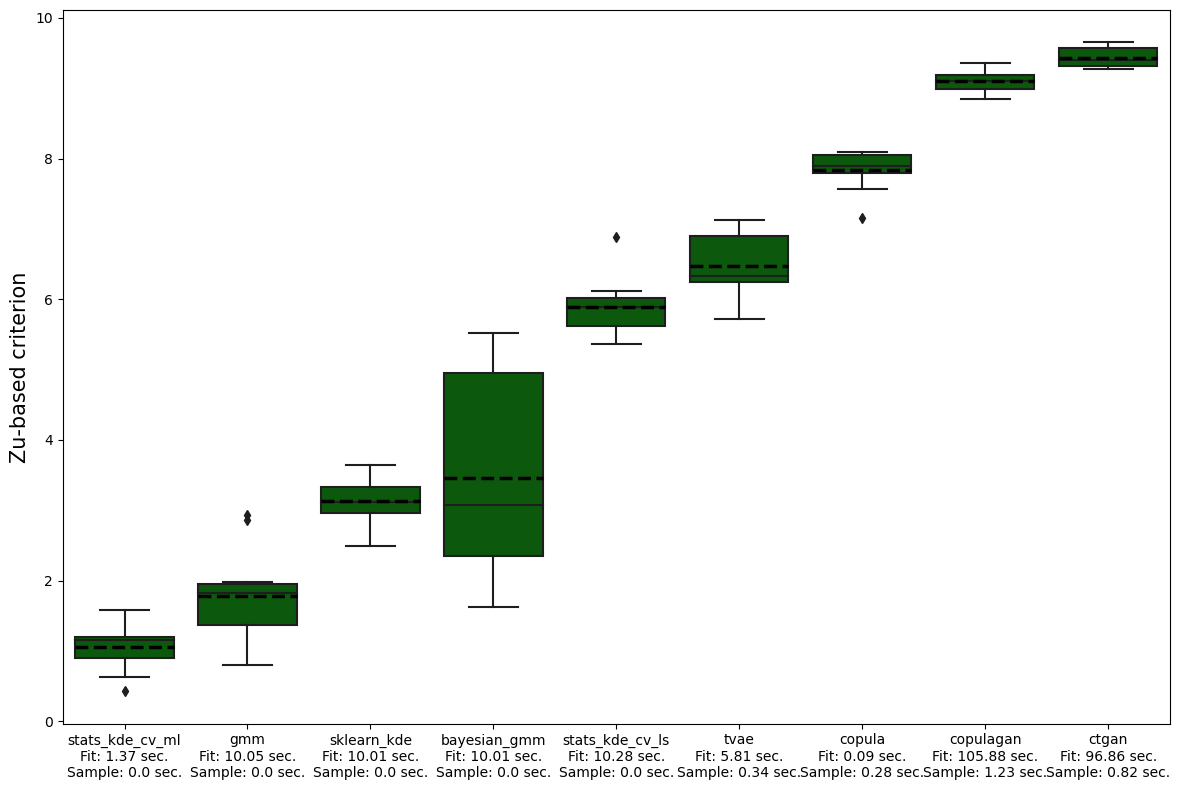

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

alg_name = []
scores_list = []
for meth in list(clf.info_["gen_models"].keys()):
    scores = list(np.array(clf.info_["gen_models"][meth]["score"]).reshape(1,-1))[0]
    scores_list.extend(scores)
    alg_name.extend([meth + "\nFit: " + str(round(np.mean(clf.info_["gen_models"][meth]["train_time"]).microseconds*10** - 6 + np.mean(clf.info_["gen_models"][meth]["train_time"]).seconds, 2))+" sec.\n"
                     + "Sample: "+ str(round(np.mean(clf.info_["gen_models"][meth]["sampling_time"]).microseconds*10** - 6 + np.mean(clf.info_["gen_models"][meth]["sampling_time"]).seconds, 2))+" sec." for element in scores])
result = pd.DataFrame({"Alg":alg_name, "Score":scores_list})
result_group_sort = result.groupby("Alg")["Score"].mean()
name_list = list(result_group_sort.sort_values(ascending=True).index)
plt.figure(figsize=(12,8))
sns.boxplot(x=alg_name, y=scores_list, showmeans=True, meanline=True,meanprops=dict(color='black', linewidth=2.5),order=name_list, color="darkgreen")
plt.ylabel("Zu-based criterion", fontsize=15)
plt.tight_layout()
plt.show()

This plot demonstrates the alternatives that were fitted during the GenerativeModel's run. As can be seen, KDE and GMM methods are the most efficient for the given dataset.